Import libraries

In [1]:
import pandas as pd
import numpy as np # library to handle data in a vectorized manner

import geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
!pip install folium
import folium # map rendering library

print('Libraries imported.')


Libraries imported.


In [2]:
def top_venues(num_top_venues,data):
    for hood in data['Neighbourhood']:
        print("----"+hood+"----")
        temp = data[data['Neighbourhood'] == hood].T.reset_index()
        temp.columns = ['venue','freq']
        temp = temp.iloc[1:]
        temp['freq'] = temp['freq'].astype(float)
        temp = temp.round({'freq': 2})
        print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
        print('\n')

In [3]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [4]:
# create a new dataframe
def venues_to_dataframe(num_top_venues,columns,data,col):
    indicators = ['st', 'nd', 'rd']
    
    # create columns according to number of top venues
    for ind in np.arange(num_top_venues):
        try:
            columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Most Common Venue'.format(ind+1))
    neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
    neighbourhoods_venues_sorted[col] = data[col]   
    for ind in np.arange(data.shape[0]):
        neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(data.iloc[ind, :], num_top_venues)
    return neighbourhoods_venues_sorted


In [5]:
def get_colors(n):
    return list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))

In [6]:
neighbourhoods=pd.read_csv('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/neighbourhoods_london.csv',index_col=0)

In [7]:
neighbourhoods.shape

(563, 4)

Read borough_CLustering_05 csvfile

In [8]:

bc05=pd.read_csv('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/Borough_Cluster_05.csv',index_col=0)

In [9]:
for ii in bc05.columns:
    
        bc05[ii][0]=[x.strip() for x in eval(bc05[ii][0])]

In [10]:
London_neig_grouped=pd.read_csv('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/london_neig_grouped_CATEGORY_mean.csv', index_col=0)

In [11]:
London_neig_grouped.head()

,Neighbourhood,arts_entertainment,building,education,event,food,nightlife,parks_outdoors,shops,travel
0,Abbey Wood,0.0,0.0,0.0,0.0,0.00,0.00,0.50,0.50,0.00
1,Acton,0.0,0.0,0.0,0.0,0.20,0.00,0.10,0.30,0.40
2,Addington,0.0,0.0,0.0,0.0,0.25,0.00,0.00,0.25,0.50
3,Addiscombe,0.0,0.0,0.0,0.0,0.50,0.00,0.25,0.25,0.00
4,Albany Park,0.0,0.0,0.0,0.0,0.25,0.25,0.00,0.25,0.25


In [12]:
bc051=pd.DataFrame(bc05['1'][0],columns=['Borough'])

In [13]:
pp=neighbourhoods.loc[neighbourhoods['Borough'].isin(bc051['Borough'].values)]['Neighbourhood']

In [14]:
London_neig_grouped_mean=London_neig_grouped.loc[London_neig_grouped['Neighbourhood'].isin(pp.values)]

Let's print each neighbourhood with the 10 most common venues

In [15]:
London_neig_grouped_mean.shape

(14, 10)

In [16]:
num_top_venues = 5
top_venues(num_top_venues,London_neig_grouped_mean)

----Beckton----
                venue  freq
0               shops  0.56
1              travel  0.22
2            building  0.11
3           nightlife  0.11
4  arts_entertainment  0.00


----Canning Town----
                venue  freq
0               shops  0.43
1  arts_entertainment  0.14
2                food  0.14
3      parks_outdoors  0.14
4              travel  0.14


----Custom House----
                venue  freq
0                food  0.48
1              travel  0.34
2           nightlife  0.07
3      parks_outdoors  0.07
4  arts_entertainment  0.03


----East Ham----
            venue  freq
0            food  0.33
1           shops  0.33
2       nightlife  0.13
3  parks_outdoors  0.13
4        building  0.07


----Forest Gate----
                venue  freq
0                food  0.50
1               shops  0.25
2              travel  0.17
3           nightlife  0.08
4  arts_entertainment  0.00


----Little Ilford----
                venue  freq
0                food  0.50
1

Let's put that into a pandas dataframe. First, let's write a function to sort the venues in descending order.

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [17]:
neighbourhoods_venues_sorted=venues_to_dataframe(num_top_venues,['Neighbourhood'],London_neig_grouped_mean,'Neighbourhood')

In [18]:
neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
29,Beckton,shops,travel,nightlife,building,parks_outdoors
76,Canning Town,shops,travel,parks_outdoors,food,arts_entertainment
125,Custom House,food,travel,parks_outdoors,nightlife,arts_entertainment
143,East Ham,shops,food,parks_outdoors,nightlife,building
168,Forest Gate,food,shops,travel,nightlife,parks_outdoors


Cluster Neighborhoods. Analize the existence of an optim clusters number kclusters



In [19]:
London_neig_grouped_clustering = London_neig_grouped_mean.drop('Neighbourhood', 1)

In [20]:
London_neig_grouped_clustering

,arts_entertainment,building,education,event,food,nightlife,parks_outdoors,shops,travel
29,0.000000,0.111111,0.0,0.0,0.000000,0.111111,0.000000,0.555556,0.222222
76,0.142857,0.000000,0.0,0.0,0.142857,0.000000,0.142857,0.428571,0.142857
125,0.034483,0.000000,0.0,0.0,0.482759,0.068966,0.068966,0.000000,0.344828
143,0.000000,0.066667,0.0,0.0,0.333333,0.133333,0.133333,0.333333,0.000000
168,0.000000,0.000000,0.0,0.0,0.500000,0.083333,0.000000,0.250000,0.166667
275,0.000000,0.250000,0.0,0.0,0.500000,0.000000,0.000000,0.250000,0.000000
286,0.000000,0.000000,0.0,0.0,0.500000,0.000000,0.250000,0.250000,0.000000
288,0.107692,0.015385,0.0,0.0,0.400000,0.092308,0.000000,0.338462,0.046154
324,0.000000,0.000000,0.0,0.0,0.400000,0.000000,0.000000,0.000000,0.600000
352,0.200000,0.000000,0.0,0.0,0.400000,0.000000,0.200000,0.000000,0.200000


SSD=norm2(samples,nearest_clusters_centre) 
Elbow curve to determine the optimal number of clusters

In [21]:
SSD = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(London_neig_grouped_clustering)
    SSD.append(km.inertia_)

ELBOW CURVE FOR KMEANS

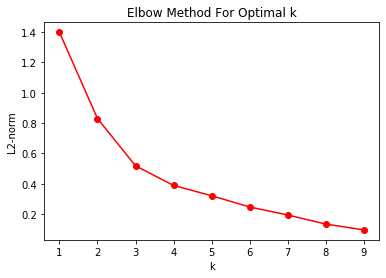

0.09664999435268862

In [22]:
import matplotlib.pyplot as plt
def elbow(norm):
    plt.plot(K,norm, 'ro-')
    plt.xlabel('k')
    plt.ylabel('L2-norm')
    plt.title('Elbow Method For Optimal k')
    return plt.show()
elbow_curve=elbow(SSD)
elbow_curve
np.min(np.array(SSD))

In [23]:
elbow_N052=np.empty([9,2])
elbow_N052=pd.DataFrame(elbow_N052,columns=['K','SSD'])
elbow_N052['K']=K
elbow_N052['SSD']=SSD
elbow_N052.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/elbow_N052.xlsx')

Cluster Neighborhoods. Run k-means to cluster the neighborhood into 5 clusters.

In [24]:
# set number of clusters
kclusters = 5

In [25]:

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(London_neig_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_labels=kmeans.labels_
kmeans_labels


array([4, 0, 1, 3, 3, 3, 3, 3, 2, 1, 0, 3, 3, 1], dtype=int32)

In [26]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
s_score=metrics.silhouette_score(London_neig_grouped_clustering,kmeans_labels, metric='euclidean')
s_score=pd.Series(s_score,index=[kclusters])

In [27]:
pp=pd.DataFrame(kmeans.labels_,columns=['Cluster Labels'])
kclusters_N052=pp['Cluster Labels'].value_counts().sort_index()
kclusters_N052=kclusters_N052.append(s_score)

Identify each neighbourhood with its Cluster Labels

In [28]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

London_neig_merged =pd.merge(neighbourhoods,neighbourhoods_venues_sorted, on='Neighbourhood').sort_values('Cluster Labels')

London_neig_merged.head() # check the last columns!

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
8,Newham,Canning Town,51.515000,0.02600,0,shops,travel,parks_outdoors,food,arts_entertainment
13,Newham,Silvertown,51.500000,0.03000,0,shops,travel,parks_outdoors,food,nightlife
0,Bromley,Plaistow,51.415148,0.01716,1,food,travel,parks_outdoors,arts_entertainment,shops
1,Newham,Plaistow,51.415148,0.01716,1,food,travel,parks_outdoors,arts_entertainment,shops
4,Newham,West Ham,51.534700,0.00769,1,food,travel,parks_outdoors,building,shops


Finally, let's visualize the resulting clusters

In [29]:
address = 'London,UK'

geolocator = Nominatim(user_agent="to_explorer",timeout=50)
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

import random

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters

colors=get_colors(kclusters)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(London_neig_merged['Latitude'], London_neig_merged['Longitude'],
                                  London_neig_merged['Neighbourhood'], London_neig_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors[cluster-1],
        fill=True,
        #fill_colors=colors[cluster-1],
        fill_colors='white',
        fill_opacity=0.1).add_to(map_clusters)
       
map_clusters


In [30]:
map_clusters.save("/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/map_London_bc05_CLUSTER_02.html")

Examine Clusters. Now, I can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, I will assign a name to each cluster.

In [31]:
    print ('CLuster 1: ')

 

CLuster 1: 


In [32]:
 London_neig_merged.loc[London_neig_merged['Cluster Labels']==0,:]
    
 

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
8,Newham,Canning Town,51.515,0.026,0,shops,travel,parks_outdoors,food,arts_entertainment
13,Newham,Silvertown,51.500,0.030,0,shops,travel,parks_outdoors,food,nightlife


In [33]:
 print ('CLuster 2: ')

CLuster 2: 


In [34]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==1,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bromley,Plaistow,51.415148,0.01716,1,food,travel,parks_outdoors,arts_entertainment,shops
1,Newham,Plaistow,51.415148,0.01716,1,food,travel,parks_outdoors,arts_entertainment,shops
4,Newham,West Ham,51.534700,0.00769,1,food,travel,parks_outdoors,building,shops
6,Newham,Custom House,51.507600,0.02970,1,food,travel,parks_outdoors,nightlife,arts_entertainment


In [35]:
print ('Cluster 3: ')

Cluster 3: 


In [36]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==2,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
12,Newham,North Woolwich,51.501,0.058,2,travel,food,shops,parks_outdoors,nightlife


In [37]:
print('Cluster 4: ')

Cluster 4: 


In [38]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==3,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,Newham,Maryland,51.545000,-0.002000,3,food,shops,arts_entertainment,nightlife,travel
3,Newham,Manor Park,51.550330,0.056219,3,food,shops,parks_outdoors,travel,nightlife
7,Newham,Stratford,51.542300,-0.002560,3,food,shops,nightlife,arts_entertainment,travel
9,Newham,Upton Park,51.533043,0.036472,3,shops,food,travel,nightlife,building
10,Newham,Upton Park,51.535072,0.041972,3,shops,food,travel,nightlife,building
11,Newham,Forest Gate,51.550832,0.027390,3,food,shops,travel,nightlife,parks_outdoors
14,Newham,East Ham,51.532300,0.055400,3,shops,food,parks_outdoors,nightlife,building
15,Newham,Little Ilford,51.550900,0.054900,3,food,shops,building,travel,parks_outdoors


In [39]:
print('Cluster 5:')

Cluster 5:


In [40]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==4,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
5,Newham,Beckton,51.5146,0.0673,4,shops,travel,nightlife,building,parks_outdoors


In [41]:
x=[]
y=[]
for ii in range(kclusters):
    x.append(London_neig_merged.loc[London_neig_merged['Cluster Labels']==ii,:]['Latitude'].mean())
    y.append(London_neig_merged.loc[London_neig_merged['Cluster Labels']==ii,:]['Longitude'].mean())
Centroids_N052=np.empty([kclusters,2])                                         
Centroids_N052=pd.DataFrame(Centroids_N052, columns=['x-Latitude','y-Longitude']) 
Centroids_N052['x-Latitude']=x
Centroids_N052['y-Longitude']=y
Centroids_N052.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/Centroids_N052.xlsx')

In [42]:
Centroids_N052

,x-Latitude,y-Longitude
0,51.507500,0.028000
1,51.468149,0.017927
2,51.501000,0.058000
3,51.542472,0.033474
4,51.514600,0.067300


In [43]:
features=London_neig_grouped_clustering.columns.tolist()
# clustering purity 
score=pd.DataFrame(index=features,columns=range(kclusters))

for ii in range(kclusters):
           pp=London_neig_merged.loc[London_neig_merged['Cluster Labels']==ii,:].\
                        groupby("1st Most Common Venue").count()['Neighbourhood']
           for nn in range(len(features)):
                try: 
                    score.loc[features[nn],ii]=pp.loc[features[nn]]
                except:
                    score.loc[features[nn],ii]=0
score

,0,1,2,3,4
arts_entertainment,0,0,0,0,0
building,0,0,0,0,0
education,0,0,0,0,0
event,0,0,0,0,0
food,0,4,0,5,0
nightlife,0,0,0,0,0
parks_outdoors,0,0,0,0,0
shops,2,0,0,3,1
travel,0,0,1,0,0


In [44]:
p_score=score.max().sum()/score.sum().sum()
p_score=pd.Series(p_score,index=[kclusters+1])
kclusters_N052=kclusters_N052.append(p_score)

In [45]:
kclusters_N052.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/Kclusters_N052.xlsx')
kclusters_N052

0    2.000000
1    3.000000
2    1.000000
3    7.000000
4    1.000000
5    0.263582
6    0.812500
dtype: float64